In [156]:
# HUOM !
# pip install scipy
# pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import statsmodels.api as sm
from scipy.stats import chi2

import seaborn as sns

In [157]:
df = pd.read_csv("Stroke_v1.csv")
df.head(10)

,ID,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Stroke
0,1,117,1,2,8.0,1080,27,1913,M,1
1,2,62,0,8,5.5,2120,55,1949,M,0
2,3,74,0,6,4.8,3170,65,1976,M,0
3,4,77,0,5,4.2,4740,61,1973,F,0
4,5,67,0,8,4.5,1900,53,1929,M,0
5,6,76,0,6,6.2,3410,72,1959,F,0
6,7,63,0,7,4.1,3640,71,1979,F,0
7,8,75,0,5,5.2,2500,99,1960,F,0
8,9,70,0,6,4.9,2110,48,1922,F,0
9,10,82,0,5,5.8,2560,34,2007,F,1


In [158]:
df.shape

(1000, 10)

In [159]:
df.dropna() # poistetaan rivit, joilla Nan value jossain kentässä
df.drop_duplicates() # poistetaan duplikaatit
df.shape

(1000, 10)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1000 non-null   int64  
 1   Weight        1000 non-null   int64  
 2   Smoking       1000 non-null   int64  
 3   Exercise      1000 non-null   int64  
 4   Cholesterol   1000 non-null   float64
 5   Income        1000 non-null   int64  
 6   Exphappiness  1000 non-null   int64  
 7   Birthyear     1000 non-null   int64  
 8   Sex           1000 non-null   object 
 9   Stroke        1000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 78.2+ KB


In [161]:
df["Sex"].replace(["M","F"],[1,2], inplace=True )

C:\Users\35850\AppData\Local\Temp\ipykernel_23096\941528171.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sex"].replace(["M","F"],[1,2], inplace=True )
C:\Users\35850\AppData\Local\Temp\ipykernel_23096\941528171.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"].replace(["M","F"

In [162]:
df.drop("ID", axis=1, inplace=True)

In [163]:
df.head(5)

,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Stroke
0,117,1,2,8.0,1080,27,1913,1,1
1,62,0,8,5.5,2120,55,1949,1,0
2,74,0,6,4.8,3170,65,1976,1,0
3,77,0,5,4.2,4740,61,1973,2,0
4,67,0,8,4.5,1900,53,1929,1,0


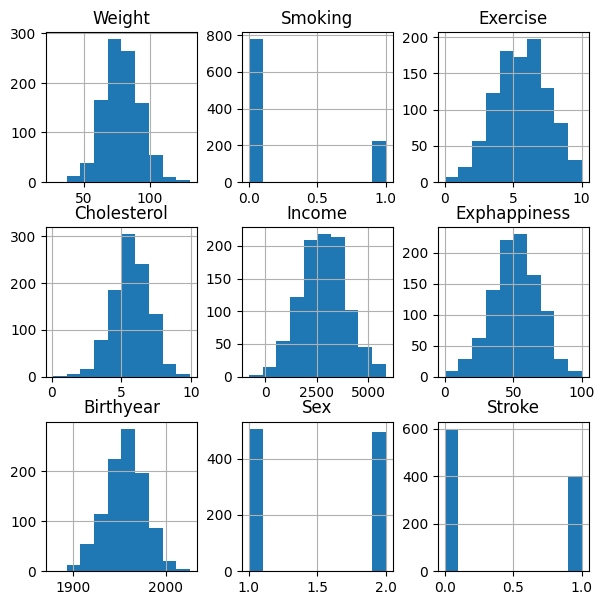

In [164]:
df.hist(figsize=(7,7))
plt.show()

In [165]:
unique_values = df["Exercise"].unique()
print(unique_values)

[ 2  8  6  5  7  9  4  1  3  0 10]


In [166]:
df.describe()

,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Stroke
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,78.752000,0.223000,5.119000,5.658400,2827.990000,51.024000,1955.716000,1.494000,0.400000
std,13.939038,0.416467,1.924199,1.312262,1105.714549,16.805888,21.149341,0.500214,0.490143
min,27.000000,0.000000,0.000000,0.100000,-790.000000,0.000000,1878.000000,1.000000,0.000000
25%,70.000000,0.000000,4.000000,4.800000,2087.500000,40.000000,1942.000000,1.000000,0.000000
50%,78.000000,0.000000,5.000000,5.600000,2830.000000,51.000000,1957.000000,1.000000,0.000000
75%,88.000000,0.000000,6.000000,6.500000,3562.500000,62.000000,1971.000000,2.000000,1.000000
max,130.000000,1.000000,10.000000,9.900000,5860.000000,100.000000,2026.000000,2.000000,1.000000


In [167]:
df = df[df["Income"]> 0]
df.shape

(995, 9)

In [168]:
df.describe()

,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Stroke
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,78.712563,0.223116,5.124623,5.651658,2843.477387,51.079397,1955.903518,1.495477,0.400000
std,13.943108,0.416545,1.926347,1.309155,1086.437503,16.812336,21.012709,0.500231,0.490144
min,27.000000,0.000000,0.000000,0.100000,50.000000,0.000000,1878.000000,1.000000,0.000000
25%,70.000000,0.000000,4.000000,4.800000,2100.000000,40.000000,1942.000000,1.000000,0.000000
50%,78.000000,0.000000,5.000000,5.600000,2840.000000,51.000000,1957.000000,1.000000,0.000000
75%,87.500000,0.000000,6.000000,6.500000,3570.000000,62.000000,1971.000000,2.000000,1.000000
max,130.000000,1.000000,10.000000,9.900000,5860.000000,100.000000,2026.000000,2.000000,1.000000


In [169]:
df = df[df["Birthyear"]< 2023]
df.shape

(993, 9)

In [197]:
col_index = 6
max_value = df[col_index].max()

TypeError: 'float' object is not subscriptable

### Mallin muodostaminen

In [170]:
X = df.iloc[:,:8]
Y = df.iloc[:,8] # vastemuuttuja on positio 8 eli Stroke

In [171]:
reg = LogisticRegression(max_iter=2500)
reg.fit(X,Y)

print("Coefficients: ",reg.coef_)
print("Intercept: ",reg.intercept_)


Coefficients:  [[ 7.51344373e-02  3.28429070e-01 -2.60858805e-01  2.29572715e-01
  -5.50279056e-05  2.03659822e-04  6.72459621e-03 -1.02881671e-01]]
Intercept:  [-19.38905852]


In [172]:
p_pred = reg.predict_proba(X) # todennäköisyys joka tilastoriville
print("p_pred :", p_pred, sep="\n", end="\b\n")

p_pred :
[[0.02292572 0.97707428]
 [0.93444391 0.06555609]
 [0.78050198 0.21949802]
 ...
 [0.266664   0.733336  ]
 [0.12615427 0.87384573]
 [0.62332119 0.37667881]


In [173]:
Y_pred = reg.predict(X) #ennustetulos, joka todennäköisyyden perusteella joka tilastoriville

In [174]:
# consufion matrix todellisista ja ennustetuista arvoista
cm = confusion_matrix(Y,Y_pred)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[510  87]
 [146 250]]


In [175]:
accuracy2 = accuracy_score(Y,Y_pred)
print("Accuracy calculated from training set = %.3f" % (accuracy2))

Accuracy calculated from training set = 0.765


In [176]:
print(classification_report(Y, Y_pred, target_names=["ei", "kyllä"]))

              precision    recall  f1-score   support

          ei       0.78      0.85      0.81       597
       kyllä       0.74      0.63      0.68       396

    accuracy                           0.77       993
   macro avg       0.76      0.74      0.75       993
weighted avg       0.76      0.77      0.76       993



In [177]:
reg.score(X,Y)

0.7653575025176234

### Mallin sopivuus

Fisher F-suhde malli sopivuuden arvioimiseksi. 

Sama kahdella tapaa

In [178]:

# Add a constant to X for the intercept
X_with_const = sm.add_constant(X)
model_sm = sm.Logit(Y, X_with_const).fit(disp=0)

# Get the deviance for null and fitted model
null_deviance = -2 * model_sm.llnull
residual_deviance = -2 * model_sm.llf
df = model_sm.df_model  # degrees of freedom

# Chi-square statistic
chi2_stat = null_deviance - residual_deviance
p_value = chi2.sf(chi2_stat, df)

print("Chi-squared statistic:", chi2_stat)
# print("Degrees of freedom:", df) - selittävien muuttujien määrä
print("p-value:", p_value)


Chi-squared statistic: 386.8752997778654
p-value: 1.200384777593378e-78


In [179]:
# Assuming X is your features and y is your binary target variable
# Step 1: Add a constant (intercept) to X
X_with_const = sm.add_constant(X)

# Step 2: Fit the logistic regression model with statsmodels
logit_model = sm.Logit(Y, X_with_const).fit(disp=0)

# Step 3: Get the null deviance and residual deviance
# Null deviance is the deviance of the intercept-only model
null_deviance = -2 * logit_model.llnull  # Deviance of the null model
# Residual deviance is the deviance of the full model with predictors
residual_deviance = -2 * logit_model.llf  # Deviance of the fitted model

# Degrees of freedom for the Chi-squared test
df = logit_model.df_model

# Chi-square test statistic
chi2_stat = null_deviance - residual_deviance

# Calculate the p-value
p_value = chi2.sf(chi2_stat, df)

# Print results
print("Chi-squared statistic:", chi2_stat) # Tää on se GOF, hyvä, koska suuri luku
print("Degrees of freedom:", df) # selittävien muuttujien määrä
print("p-value:", p_value) # Hyvä, koska tdeolla pieni luku, ilmeisesti....

# Interpretation:
# A low p-value (e.g., < 0.05) indicates that the model with predictors
# provides a significantly better fit than the null model with only an intercept.


Chi-squared statistic: 386.8752997778654
Degrees of freedom: 8.0
p-value: 1.200384777593378e-78


### 3) Selitysaste - pseudo R2 kerroin, ei oikein kerro mitään

In [180]:
# Assuming X is your feature matrix and y is your binary target variable
# Add a constant to X for the intercept
X_with_const = sm.add_constant(X)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(Y, X_with_const).fit(disp=0)

# Calculate McFadden's R²
null_deviance = -2 * logit_model.llnull  # Deviance of the null model (intercept-only model)
residual_deviance = -2 * logit_model.llf  # Deviance of the fitted model
pseudo_r2_mcfadden = 1 - (residual_deviance / null_deviance)

print("McFadden's Pseudo R²:", pseudo_r2_mcfadden)


McFadden's Pseudo R²: 0.2896592724998518


### 4) Ennustetarkkuus

In [181]:
print(classification_report(Y, Y_pred, target_names=["ei", "kyllä"]))
# recall ei, 0.85 >>> tarkkuus ja recall kylllä, 0.63 >>> herkkyys

              precision    recall  f1-score   support

          ei       0.78      0.85      0.81       597
       kyllä       0.74      0.63      0.68       396

    accuracy                           0.77       993
   macro avg       0.76      0.74      0.75       993
weighted avg       0.76      0.77      0.76       993



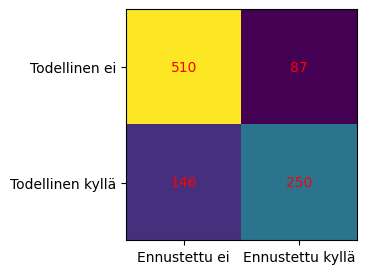

In [182]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Ennustettu ei', 'Ennustettu kyllä'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Todellinen ei', 'Todellinen kyllä'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### 5) Selittäjien merkitys

In [183]:
# Assuming X is your feature matrix and y is your binary target variable
# Add a constant to the features for the intercept term
X_with_const = sm.add_constant(X)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(Y, X_with_const).fit(disp=0)

# Get the coefficients
coefficients = logit_model.params

# Calculate Exp(b) (odds ratios) for each coefficient
odds_ratios = np.exp(coefficients)

# Display the results in a table
results = pd.DataFrame({
    "Variable": coefficients.index,
    "Coefficient (b)": coefficients.values,
    "Exp(b) (Odds Ratio)": odds_ratios.values
})

print(results)


       Variable  Coefficient (b)  Exp(b) (Odds Ratio)
0         const       -19.389369         3.795808e-09
1        Weight         0.074818         1.077688e+00
2       Smoking         0.342866         1.408980e+00
3      Exercise        -0.261392         7.699787e-01
4   Cholesterol         0.230058         1.258674e+00
5        Income        -0.000055         9.999453e-01
6  Exphappiness         0.000222         1.000222e+00
7     Birthyear         0.006737         1.006760e+00
8           Sex        -0.105954         8.994661e-01


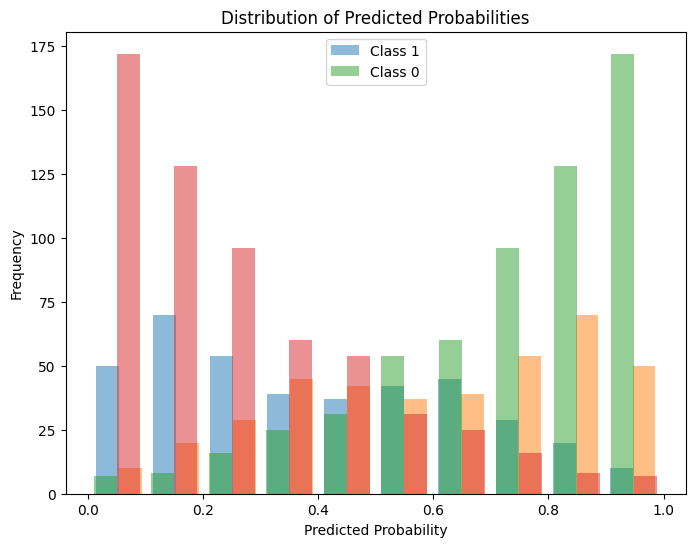

In [187]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(p_pred[Y == 1], bins=10, alpha=0.5, label='Class 1')
plt.hist(p_pred[Y == 0], bins=10, alpha=0.5, label='Class 0')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Predicted Probabilities')
plt.show()



In [190]:
print(len(X), len(p_pred))

993 993


In [191]:
plt.figure(figsize=(8, 6))

# Plot predicted probabilities vs feature (for example, the first feature)
plt.scatter(df.iloc[:, -1], p_pred, c=Y, cmap='coolwarm', edgecolors='k', alpha=0.7)

plt.xlabel('Weight')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression: Feature vs Predicted Probability')
plt.show()


AttributeError: 'float' object has no attribute 'iloc'

<Figure size 800x600 with 0 Axes>

In [ ]:
coff = pd.DataFrame(reg.coef_*100,columns=X.columns).T # T>> transponointi
coff[0].sort_values(ascending=False)

Smoking         32.842907
Cholesterol     22.957271
Weight           7.513444
Birthyear        0.672460
Exphappiness     0.020366
Income          -0.005503
Sex            -10.288167
Exercise       -26.085881
Name: 0, dtype: float64

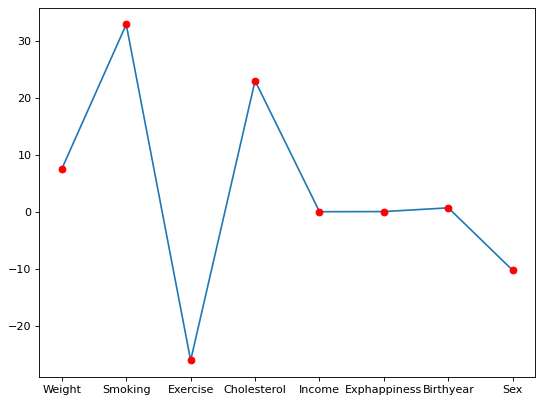

In [ ]:
figure(figsize=(8,6), dpi= 80) # voiko kulmakertoimia verrata toisiinsa???
plt.plot(coff, marker="o", mfc="red", mec="red") # markerfacecolor, markeredgecolor
plt.show()

In [ ]:
reg.predict_proba(X) # joka rivistä todennäköisyys 100% eli 1

array([[0.02292572, 0.97707428],
       [0.93444391, 0.06555609],
       [0.78050198, 0.21949802],
       ...,
       [0.266664  , 0.733336  ],
       [0.12615427, 0.87384573],
       [0.62332119, 0.37667881]])

In [ ]:
# log loss, mahdollisimman lähellä nollaa
logloss= log_loss(Y, reg.predict_proba(X))
logloss

0.47772006819288887

In [ ]:
regdata = pd.DataFrame(reg.predict_proba(X)) # edelliset luvut asetettu taulukkoon
regdata

,0,1
0,0.022926,0.977074
1,0.934444,0.065556
2,0.780502,0.219498
3,0.755902,0.244098
4,0.933002,0.066998
...,...,...
988,0.752095,0.247905
989,0.293100,0.706900
990,0.266664,0.733336
991,0.126154,0.873846


TypeError: Data source must be a DataFrame or Mapping, not <class 'float'>.

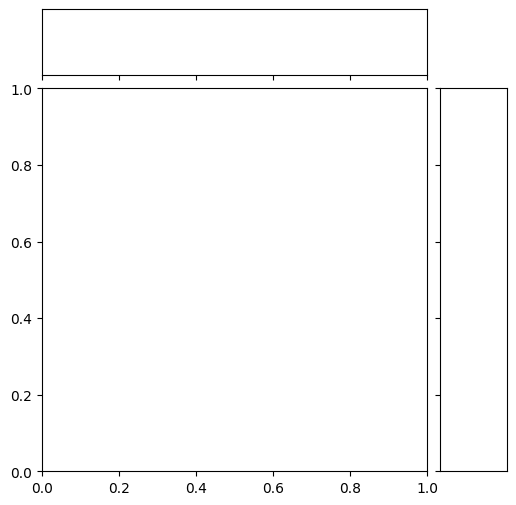

In [ ]:
sns.jointplot(x='Exercise', y='Stroke', kind="reg", data=df, palette='rainbow')
plt.show()

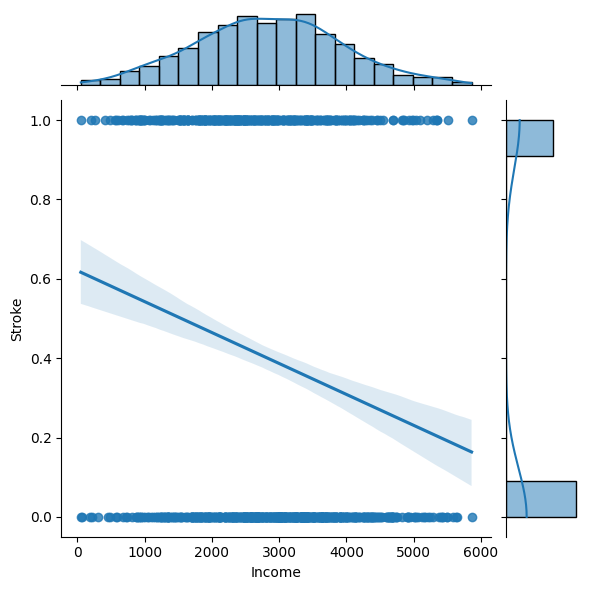

In [ ]:
sns.jointplot(x='Income', y='Stroke', kind="reg", data=df, palette='rainbow')
plt.show()

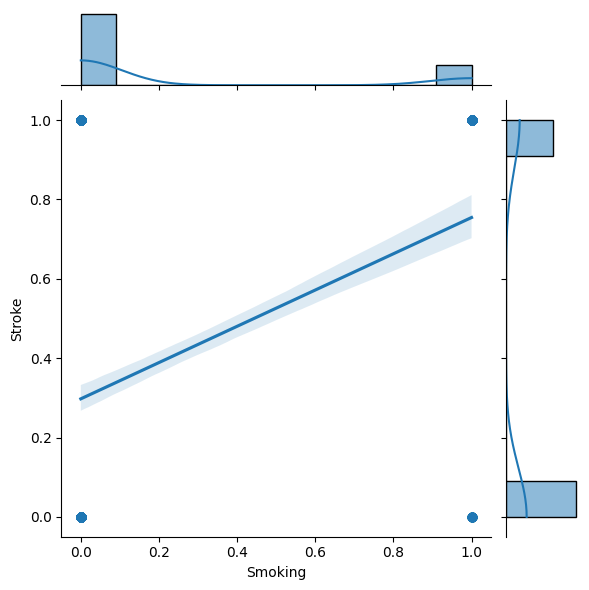

In [ ]:
sns.jointplot(x='Smoking', y='Stroke', kind="reg", data=df, palette='rainbow')
plt.show()

Text(0.5, 1.0, 'Tupakointi ja kohtauksen jakautuminen')

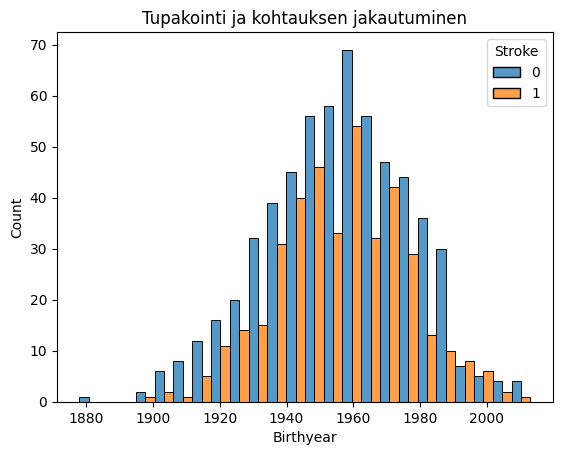

In [ ]:
sns.histplot(
    data=df,
    x="Birthyear", 
    hue="Stroke", 
    multiple="dodge"
).set_title("Tupakointi ja kohtauksen jakautuminen")

Text(0.5, 1.0, 'Liikunnan ja kohtauksen jakautuminen')

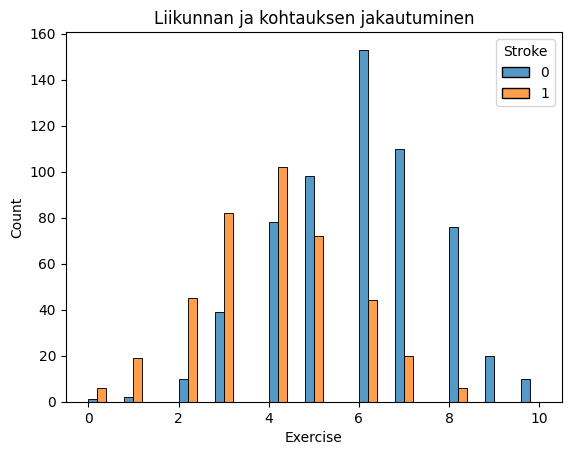

In [ ]:
sns.histplot(
    data=df,
    x="Exercise", 
    hue="Stroke", 
    multiple="dodge"
).set_title("Liikunnan ja kohtauksen jakautuminen")

<Axes: >

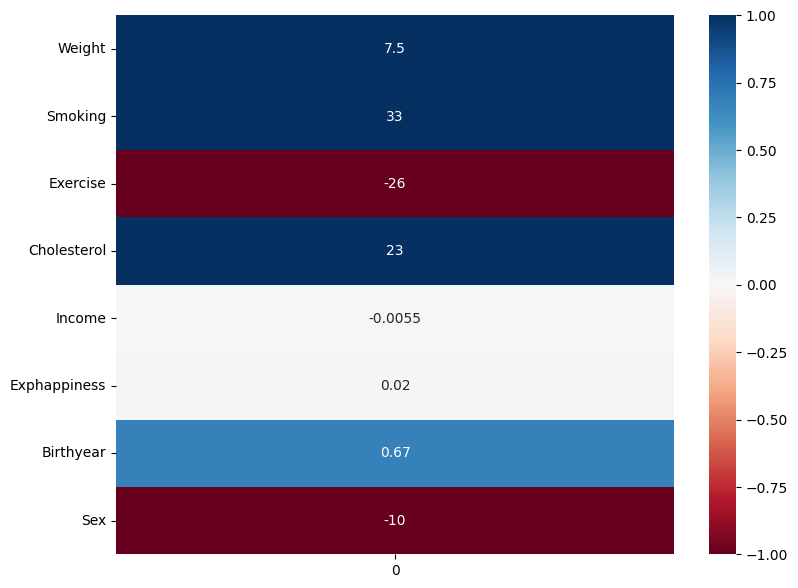

In [ ]:
# HUOM! TEE TÄMÄ UUDELLEEN!!! Muodosta muuttuja korrelaatio
plt.figure(figsize=(9,7)) # 
sns.heatmap(coff,vmin=-1.0,vmax=1.0, cmap='RdBu', annot=True)

In [ ]:
# Assuming X is a 2D array with one feature (for a simple 2D plot)
# If X has more than one feature, select one feature for visualization
X_feature = X[:, 0]  # Adjust as needed to choose the relevant feature

# Fit logistic regression model
reg2 = LogisticRegression(max_iter=5000)
reg2.fit(X, Y)

# Create a range of values for X to generate a smooth curve
X_range = np.linspace(X_feature.min(), X_feature.max(), 300).reshape(-1, 1)

# Predict probabilities for the range of X values
p1_pred = reg2.predict_proba(X_range)[:, 1]  # Probability for the positive class

# Plot the logistic regression curve
plt.figure(figsize=(8, 6))
plt.plot(X_range, p1_pred, color='red', label='Logistic Regression Curve')
plt.scatter(X_feature, Y, color='blue', alpha=0.5, label='Data Points')  # Plot actual data points
plt.xlabel("X feature")
plt.ylabel("Probability")
plt.legend()
plt.show()


InvalidIndexError: (slice(None, None, None), 0)